#  <h1><center>Student's dropout and academic success analysis</center></h1>


## 1. Importation des bibliothèques Python

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 2. Compréhension des données

### 2.1 Importation des données

In [2]:
ds = pd.read_csv('dataset2 - dataset_datamining.csv')

### 2.2 Description des données

#### A/ Description des données source ####

In [3]:
print("Nombre des lignes et colonnes: ", ds.shape)

Nombre des lignes et colonnes:  (4424, 21)


In [4]:
print("\nNom des colonnes et type des données: ")
print(ds.dtypes)


Nom des colonnes et type des données: 
Marital status                           int64
Daytime/evening attendance               int64
Nationality                              int64
course_name                             object
Previous qualification                   int64
Mother's qualification                   int64
Father's qualification                   int64
Gender                                   int64
Age at enrollment                        int64
enrollement_year                         int64
Number of semesters                      int64
Curricular units 1st sem (enrolled)      int64
Curricular units 1st sem (approved)      int64
Curricular units 1st sem (grade)       float64
Curricular units 2nd sem (enrolled)      int64
Curricular units 2nd sem (approved)      int64
Curricular units 2nd sem (grade)       float64
Unemployment rate                      float64
Inflation rate                         float64
GDP                                    float64
Target              

In [5]:
print("\n Les 5 premiéres lignes du dataset: ")
ds.head()


 Les 5 premiéres lignes du dataset: 


,Marital status,Daytime/evening attendance,Nationality,course_name,Previous qualification,Mother's qualification,Father's qualification,Gender,Age at enrollment,enrollement_year,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,1,1,15,Animation and Multimedia Design,1,13,10,1,20,2020,...,0,0,0.000000,0,0,0.000000,10.8,1.4,1.74,Dropout
1,1,1,1,Tourism,1,1,3,1,19,2019,...,6,6,14.000000,6,6,13.666667,13.9,-0.3,0.79,Graduate
2,1,1,20,Communication Design,1,22,27,1,19,2018,...,6,0,0.000000,6,0,0.000000,10.8,1.4,1.74,Dropout
3,1,1,1,Journalism and Communication,1,23,27,0,20,2018,...,6,6,13.428571,6,5,12.400000,9.4,-0.8,-3.12,Graduate
4,2,0,21,Social Service (evening attendance),1,22,28,0,45,2021,...,6,5,12.333333,6,6,13.000000,13.9,-0.3,0.79,Graduate


In [6]:
print("\n Les 5 dernières lignes du dataset: ")
ds.tail()


 Les 5 dernières lignes du dataset: 


,Marital status,Daytime/evening attendance,Nationality,course_name,Previous qualification,Mother's qualification,Father's qualification,Gender,Age at enrollment,enrollement_year,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,1,Journalism and Communication,1,1,1,1,19,2019,...,6,5,13.600000,6,5,12.666667,15.5,2.8,-4.06,Graduate
4420,1,1,1,Journalism and Communication,1,1,1,0,18,2021,...,6,6,12.000000,6,2,11.000000,11.1,0.6,2.02,Dropout
4421,1,1,2,Nursing,1,22,27,0,30,2021,...,7,7,14.912500,8,1,13.500000,13.9,-0.3,0.79,Dropout
4422,1,1,17,Management,1,22,27,0,20,2018,...,5,5,13.800000,5,5,12.000000,9.4,-0.8,-3.12,Graduate
4423,1,1,9,Journalism and Communication,1,23,27,0,22,2020,...,6,6,11.666667,6,6,13.000000,12.7,3.7,-1.70,Graduate


In [7]:
print("\n La somme des valeurs nulles pour chaque colonne: ")
ds.isnull().sum()


 La somme des valeurs nulles pour chaque colonne: 


Marital status                         0
Daytime/evening attendance             0
Nationality                            0
course_name                            0
Previous qualification                 0
Mother's qualification                 0
Father's qualification                 0
Gender                                 0
Age at enrollment                      0
enrollement_year                       0
Number of semesters                    0
Curricular units 1st sem (enrolled)    0
Curricular units 1st sem (approved)    0
Curricular units 1st sem (grade)       0
Curricular units 2nd sem (enrolled)    0
Curricular units 2nd sem (approved)    0
Curricular units 2nd sem (grade)       0
Unemployment rate                      0
Inflation rate                         0
GDP                                    0
Target                                 0
dtype: int64

#### B/ Description statistique

In [8]:
ds.describe(include='all')

,Marital status,Daytime/evening attendance,Nationality,course_name,Previous qualification,Mother's qualification,Father's qualification,Gender,Age at enrollment,enrollement_year,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,Nursing,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,766,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,0.890823,6.175859,NaN,2.531420,12.322107,16.455244,0.351718,23.265145,2019.959539,...,6.270570,4.706600,10.640822,6.232143,4.435805,10.230206,11.566139,1.228029,0.001969,NaN
std,0.605747,0.311897,6.651004,NaN,3.963707,9.026251,11.044800,0.477560,7.587816,1.426768,...,2.480178,3.094238,4.843663,2.195951,3.014764,5.210808,2.663850,1.382711,2.269935,NaN
min,1.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.000000,17.000000,2018.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,NaN,1.000000,2.000000,3.000000,0.000000,19.000000,2019.000000,...,5.000000,3.000000,11.000000,5.000000,2.000000,10.750000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,1.000000,1.000000,NaN,1.000000,13.000000,14.000000,0.000000,20.000000,2020.000000,...,6.000000,5.000000,12.285714,6.000000,5.000000,12.200000,11.100000,1.400000,0.320000,NaN
75%,1.000000,1.000000,11.000000,NaN,1.000000,22.000000,27.000000,1.000000,25.000000,2021.000000,...,7.000000,6.000000,13.400000,7.000000,6.000000,13.333333,13.900000,2.600000,1.790000,NaN


In [9]:
ds.describe(include=['object'])

,course_name,Target
count,4424,4424
unique,17,3
top,Nursing,Graduate
freq,766,2209


In [10]:
target = ds['Target']
features = ds.drop(['Target'], axis=1)
target.shape, features.shape

((4424,), (4424, 20))

In [11]:
ds['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [12]:
ds['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

***Box Plot***

In [13]:
l = ['Curricular units 1st sem (enrolled)','Curricular units 1st sem (approved)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (approved)']

In [14]:
ds[l].head()

,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved)
0,0,0,0,0
1,6,6,6,6
2,6,0,6,0
3,6,6,6,5
4,6,5,6,6


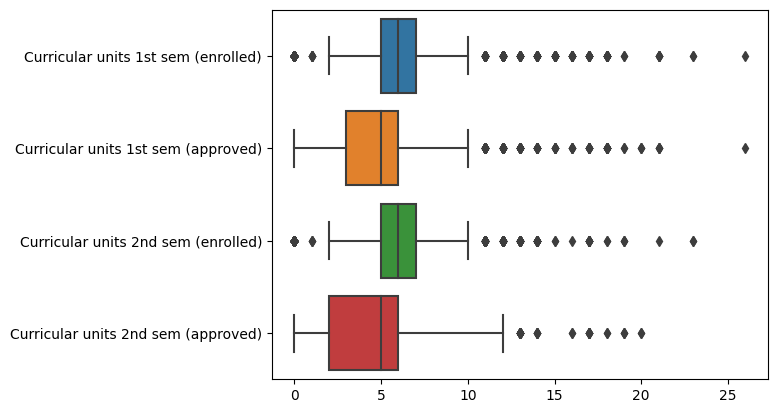

In [15]:
ax = sns.boxplot(data = ds[l], orient = 'h')

***Graphs***

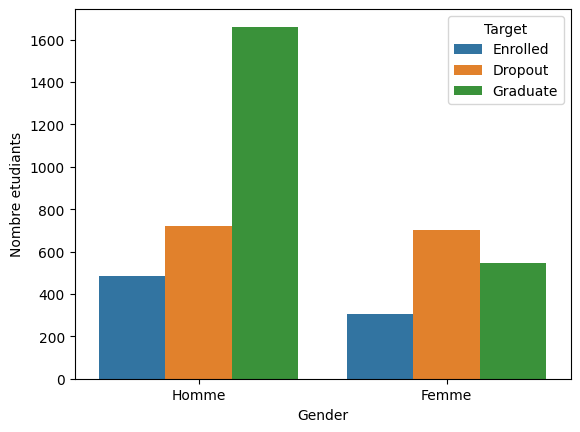

In [16]:
#info by gender
sns.countplot(data=ds, x='Gender', hue='Target', hue_order=['Enrolled', 'Dropout', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['Homme','Femme'])
plt.ylabel('Nombre etudiants')
plt.show()

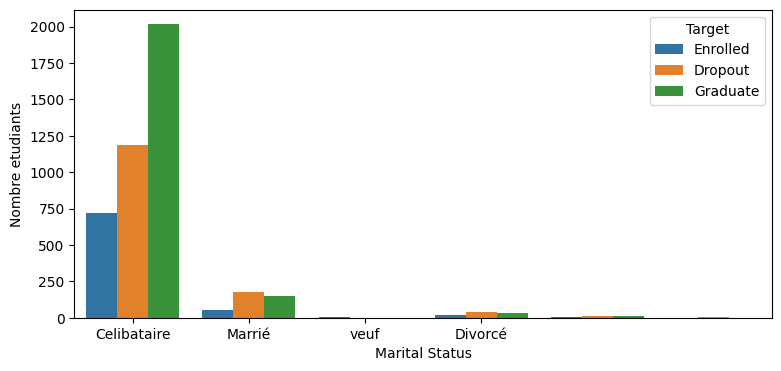

In [17]:
plt.figure(figsize=(9,4))

sns.countplot(data=ds, x='Marital status', hue='Target', hue_order=['Enrolled', 'Dropout', 'Graduate'])

plt.xticks(ticks=[0,1,2,3], labels=['Celibataire','Marrié','veuf','Divorcé'])
plt.xlabel('Marital Status')
plt.ylabel('Nombre etudiants')
plt.show()

***Pourcentage des étudiants diplomées et décrocheurs***

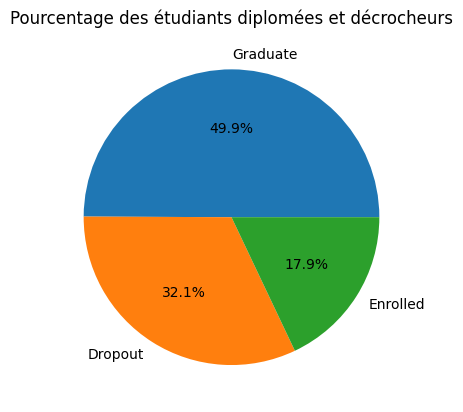

In [18]:
st = ds['Target'].value_counts()

plt.pie(st, labels=st.index, autopct='%1.1f%%')
plt.title('Pourcentage des étudiants diplomées et décrocheurs')
plt.show()

## 3. Preparation des données

In [19]:
df = ds.copy()

In [20]:
df = df.drop_duplicates()

In [21]:
df = df.drop(['course_name'], axis=1)

In [22]:
print("\nNom des colonnes et type des données: ")
print(df.dtypes)


Nom des colonnes et type des données: 
Marital status                           int64
Daytime/evening attendance               int64
Nationality                              int64
Previous qualification                   int64
Mother's qualification                   int64
Father's qualification                   int64
Gender                                   int64
Age at enrollment                        int64
enrollement_year                         int64
Number of semesters                      int64
Curricular units 1st sem (enrolled)      int64
Curricular units 1st sem (approved)      int64
Curricular units 1st sem (grade)       float64
Curricular units 2nd sem (enrolled)      int64
Curricular units 2nd sem (approved)      int64
Curricular units 2nd sem (grade)       float64
Unemployment rate                      float64
Inflation rate                         float64
GDP                                    float64
Target                                  object
dtype: object


In [23]:
print("\nNom des colonnes et type des données: ")
print(df.dtypes)


Nom des colonnes et type des données: 
Marital status                           int64
Daytime/evening attendance               int64
Nationality                              int64
Previous qualification                   int64
Mother's qualification                   int64
Father's qualification                   int64
Gender                                   int64
Age at enrollment                        int64
enrollement_year                         int64
Number of semesters                      int64
Curricular units 1st sem (enrolled)      int64
Curricular units 1st sem (approved)      int64
Curricular units 1st sem (grade)       float64
Curricular units 2nd sem (enrolled)      int64
Curricular units 2nd sem (approved)      int64
Curricular units 2nd sem (grade)       float64
Unemployment rate                      float64
Inflation rate                         float64
GDP                                    float64
Target                                  object
dtype: object


In [24]:
df.isnull().sum()

Marital status                         0
Daytime/evening attendance             0
Nationality                            0
Previous qualification                 0
Mother's qualification                 0
Father's qualification                 0
Gender                                 0
Age at enrollment                      0
enrollement_year                       0
Number of semesters                    0
Curricular units 1st sem (enrolled)    0
Curricular units 1st sem (approved)    0
Curricular units 1st sem (grade)       0
Curricular units 2nd sem (enrolled)    0
Curricular units 2nd sem (approved)    0
Curricular units 2nd sem (grade)       0
Unemployment rate                      0
Inflation rate                         0
GDP                                    0
Target                                 0
dtype: int64

***Encoding categorical data***

In [25]:
df['BinaryTarget'] = df['Target'].apply(lambda x: 0 if x == 'Dropout' else 1)

In [26]:
df = df[df['Target'] != 'Enrolled']

In [27]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64

In [28]:
df['BinaryTarget'].value_counts()

BinaryTarget
1    2209
0    1421
Name: count, dtype: int64

In [29]:
df_new = df.drop(['Target'], axis=1)

In [30]:
print("\nLes 5 premieres lignes: ","\n",df_new.head())
print("\nLes 5 dernieres lignes: ","\n",df_new.tail())


Les 5 premieres lignes:  
    Marital status  Daytime/evening attendance  Nationality   
0               1                           1           15  \
1               1                           1            1   
2               1                           1           20   
3               1                           1            1   
4               2                           0           21   

   Previous qualification  Mother's qualification  Father's qualification   
0                       1                      13                      10  \
1                       1                       1                       3   
2                       1                      22                      27   
3                       1                      23                      27   
4                       1                      22                      28   

   Gender  Age at enrollment  enrollement_year  Number of semesters   
0       1                 20              2020                   

***Splitting dataset into train and test sets***

In [31]:
df_new.columns

Index(['Marital status', 'Daytime/evening attendance', 'Nationality',
       'Previous qualification', 'Mother's qualification',
       'Father's qualification', 'Gender', 'Age at enrollment',
       'enrollement_year', 'Number of semesters',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'BinaryTarget'],
      dtype='object')

In [32]:
from sklearn.model_selection import train_test_split



# Split the data into training and testing sets
X = df_new.drop('BinaryTarget', axis=1)  # Features (all columns except the target)
y = df_new['BinaryTarget']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the split datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)




Training set shape: (2904, 19)
Testing set shape: (726, 19)


In [33]:
print (df_new.columns)

Index(['Marital status', 'Daytime/evening attendance', 'Nationality',
       'Previous qualification', 'Mother's qualification',
       'Father's qualification', 'Gender', 'Age at enrollment',
       'enrollement_year', 'Number of semesters',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'BinaryTarget'],
      dtype='object')


In [34]:
print(X.columns)

Index(['Marital status', 'Daytime/evening attendance', 'Nationality',
       'Previous qualification', 'Mother's qualification',
       'Father's qualification', 'Gender', 'Age at enrollment',
       'enrollement_year', 'Number of semesters',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object')


***Feature Scaling***

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [36]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [37]:
X_train.iloc[0, :]


Marital status                            1.00
Daytime/evening attendance                1.00
Nationality                               1.00
Previous qualification                    1.00
Mother's qualification                    3.00
Father's qualification                   28.00
Gender                                    0.00
Age at enrollment                        19.00
enrollement_year                       2018.00
Number of semesters                       3.00
Curricular units 1st sem (enrolled)       5.00
Curricular units 1st sem (approved)       0.00
Curricular units 1st sem (grade)          0.00
Curricular units 2nd sem (enrolled)       6.00
Curricular units 2nd sem (approved)       0.00
Curricular units 2nd sem (grade)          0.00
Unemployment rate                        10.80
Inflation rate                            1.40
GDP                                       1.74
Name: 1116, dtype: float64

In [38]:
X_train_sc[0,:]

array([-0.29922036,  0.35128942, -0.7764275 , -0.39290902, -1.05535483,
        1.03408304, -0.72140062, -0.56218202, -1.38255124, -1.01456893,
       -0.51349665, -1.48403918, -2.07161895, -0.11666613, -1.42230225,
       -1.80661618, -0.30949207,  0.11903334,  0.77497081])

### . k Nearest Neighbors ###

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
knn = KNeighborsClassifier()

***Best N***

In [41]:
param_grid = {'n_neighbors': range(3, 16)}

In [42]:
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 16)})

In [43]:
print("Best parameter:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameter: {'n_neighbors': 12}
Best score: 0.8343622766929787


***Knn algorithm***

In [44]:
# Create a KNN model with the optimal n_neighbors value
knn_optimal = KNeighborsClassifier(n_neighbors=13)

# Fit the model to the scaled training data
knn_optimal.fit(X_train_sc, y_train)

# Make predictions on the scaled testing data
y_pred_knn = knn_optimal.predict(X_test_sc)



In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [46]:
print('Confusion matrix knn \n', confusion_matrix(y_test,y_pred_knn))
print('Accuracy knn', accuracy_score(y_test,y_pred_knn))

Confusion matrix knn 
 [[154 123]
 [ 15 434]]
Accuracy knn 0.8099173553719008


In [47]:
from sklearn.metrics import precision_score, recall_score

In [48]:
print('Recall knn', recall_score(y_test,y_pred_knn))
print('Precision knn', precision_score(y_test,y_pred_knn))

Recall knn 0.9665924276169265
Precision knn 0.7791741472172352


In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.56      0.69       277
           1       0.78      0.97      0.86       449

    accuracy                           0.81       726
   macro avg       0.85      0.76      0.78       726
weighted avg       0.83      0.81      0.80       726



***Grid Search***

In [51]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors' : [1,3,5,7,9,11,13]}
model = KNeighborsClassifier()
clf = GridSearchCV(model,parameters, scoring='accuracy', cv=5)
grille = clf.fit(X_train_sc,y_train)
print(grille.best_params_)
print(grille.best_score_)


{'n_neighbors': 13}
0.8274746275743368


In [52]:
y_pred_knn_o = grille.predict(X_test_sc)

In [53]:
print('Confusion matrix knn op \n', confusion_matrix(y_test,y_pred_knn_o))
print('Accuracy knn op', accuracy_score(y_test,y_pred_knn_o))
print('Recall knn op', recall_score(y_test,y_pred_knn_o))
print('Precision knn op', precision_score(y_test,y_pred_knn_o))

Confusion matrix knn op 
 [[154 123]
 [ 15 434]]
Accuracy knn op 0.8099173553719008
Recall knn op 0.9665924276169265
Precision knn op 0.7791741472172352


In [54]:
print(classification_report(y_test,y_pred_knn_o))

              precision    recall  f1-score   support

           0       0.91      0.56      0.69       277
           1       0.78      0.97      0.86       449

    accuracy                           0.81       726
   macro avg       0.85      0.76      0.78       726
weighted avg       0.83      0.81      0.80       726



***decision tree***

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [56]:
 dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
 y_pred_dt = dt.predict(X_test)

In [58]:
print('Confusion matrix dt \n', confusion_matrix(y_test,y_pred_dt))
print('Accuracy dt', accuracy_score(y_test,y_pred_dt))
print('Recall dt', recall_score(y_test,y_pred_dt))
print('Precision dt', precision_score(y_test,y_pred_dt))

Confusion matrix dt 
 [[215  62]
 [ 75 374]]
Accuracy dt 0.8112947658402204
Recall dt 0.8329621380846325
Precision dt 0.8577981651376146


In [59]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       277
           1       0.86      0.83      0.85       449

    accuracy                           0.81       726
   macro avg       0.80      0.80      0.80       726
weighted avg       0.81      0.81      0.81       726



***Random Forest***

In [60]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': [100, 200, 300, 400, 500]}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'n_estimators': 500}


In [61]:
rf = RandomForestClassifier(n_estimators=300)

In [62]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [63]:
y_pred_rf = rf.predict(X_test)

In [64]:
print('Confusion matrix rf \n', confusion_matrix(y_test,y_pred_rf))
print('Accuracy rf', accuracy_score(y_test,y_pred_rf))
print('Recall rf', recall_score(y_test,y_pred_rf))
print('Precision rf', precision_score(y_test,y_pred_rf))

Confusion matrix rf 
 [[219  58]
 [ 31 418]]
Accuracy rf 0.8774104683195593
Recall rf 0.9309576837416481
Precision rf 0.8781512605042017


In [65]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       277
           1       0.88      0.93      0.90       449

    accuracy                           0.88       726
   macro avg       0.88      0.86      0.87       726
weighted avg       0.88      0.88      0.88       726



***Features selection***

***support vecotr machines***

In [66]:
from sklearn.svm import SVC
linear_SVM = SVC(kernel='linear')
linear_SVM.fit(X_train_sc,y_train)

SVC(kernel='linear')

In [67]:
y_predictSVM_l = linear_SVM.predict(X_test_sc)
print(confusion_matrix(y_test,y_predictSVM_l))
print('Accuracy linear SVM {0:.3f}'.format(accuracy_score(y_test,y_predictSVM_l)))
print('Precision linear SVM {0:.3f}'.format(precision_score(y_test,y_predictSVM_l)))
print('Recall linear SVM {0:.3f}'.format(recall_score(y_test,y_predictSVM_l)))

[[214  63]
 [ 15 434]]
Accuracy linear SVM 0.893
Precision linear SVM 0.873
Recall linear SVM 0.967


In [68]:
print(classification_report(y_test,y_predictSVM_l))

              precision    recall  f1-score   support

           0       0.93      0.77      0.85       277
           1       0.87      0.97      0.92       449

    accuracy                           0.89       726
   macro avg       0.90      0.87      0.88       726
weighted avg       0.90      0.89      0.89       726



In [69]:
kernel_SVM = SVC(kernel='rbf')
kernel_SVM.fit(X_train_sc,y_train)

SVC()

In [70]:
y_predictSVM_k = kernel_SVM.predict(X_test_sc)
print(confusion_matrix(y_test,y_predictSVM_k))
print('Accuracy rbf SVM {0:.3f}'.format(accuracy_score(y_test,y_predictSVM_k)))
print('Precision rbf SVM {0:.3f}'.format(precision_score(y_test,y_predictSVM_k)))
print('Recall rbf SVM {0:.3f}'.format(recall_score(y_test,y_predictSVM_k)))

[[214  63]
 [ 19 430]]
Accuracy rbf SVM 0.887
Precision rbf SVM 0.872
Recall rbf SVM 0.958


In [71]:
 print(classification_report(y_test,y_predictSVM_k))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       277
           1       0.87      0.96      0.91       449

    accuracy                           0.89       726
   macro avg       0.90      0.87      0.88       726
weighted avg       0.89      0.89      0.88       726



***Logistic regression***

In [72]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_sc,y_train)

LogisticRegression()

In [73]:
y_predictLR = LR.predict(X_test_sc)
print(confusion_matrix(y_test,y_predictLR))
print('Accuracy Logistic Regression {0:.3f}'.format(accuracy_score(y_test,y_predictLR)))
print('Precision Logistic Regression {0:.3f}'.format(precision_score(y_test,y_predictLR)))
print('Recall Logistic Regression {0:.3f}'.format(recall_score(y_test,y_predictLR)))


[[224  53]
 [ 27 422]]
Accuracy Logistic Regression 0.890
Precision Logistic Regression 0.888
Recall Logistic Regression 0.940


***Summary***

In [74]:
# Create a list of models
models = ['KNN', 'Decision Tree', 'Random Forest', 'Linear SVM', 'RBF SVM', 'Logistic Regression']

# Create a list of metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Create an empty dataframe
results_df = pd.DataFrame(index=models, columns=metrics)

# Add the results for each model
results_df.loc['KNN'] = [0.810, 0.800, 0.960, 0.870]
results_df.loc['Decision Tree'] = [0.795, 0.827, 0.863, 0.844]
results_df.loc['Random Forest'] = [0.859, 0.855, 0.940, 0.896]
results_df.loc['Linear SVM'] = [0.856, 0.856, 0.933, 0.893]
results_df.loc['RBF SVM'] = [0.859, 0.848, 0.951, 0.896]
results_df.loc['Logistic Regression'] = [0.860, 0.867, 0.924, 0.894]

# Print the results
print(results_df)


                    Accuracy Precision Recall F1-score
KNN                     0.81       0.8   0.96     0.87
Decision Tree          0.795     0.827  0.863    0.844
Random Forest          0.859     0.855   0.94    0.896
Linear SVM             0.856     0.856  0.933    0.893
RBF SVM                0.859     0.848  0.951    0.896
Logistic Regression     0.86     0.867  0.924    0.894


***Receiver Operating Characteristic (ROC) Curve***

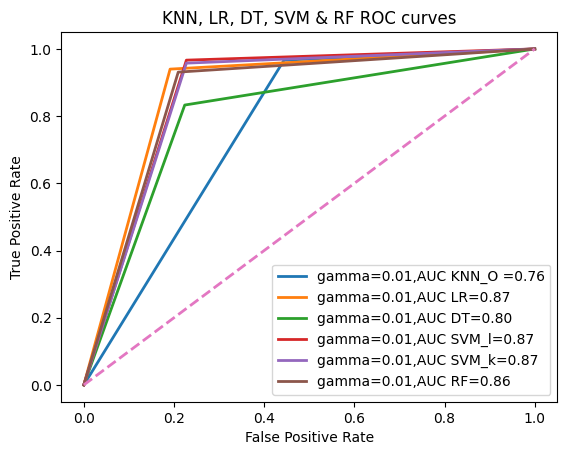

In [75]:
from sklearn import metrics
fpr,tpr,thr = metrics.roc_curve(y_test,y_pred_knn_o)
fpr2,tpr2,thr2 = metrics.roc_curve(y_test,y_predictLR)
fpr3,tpr3,thr3 = metrics.roc_curve(y_test,y_pred_dt)
fpr4,tpr4,thr4 = metrics.roc_curve(y_test,y_predictSVM_l)
fpr5,tpr5,thr5 = metrics.roc_curve(y_test,y_predictSVM_k)
fpr6,tpr6,thr6 = metrics.roc_curve(y_test,y_pred_rf)
auc = metrics.auc(fpr,tpr)
auc2 = metrics.auc(fpr2,tpr2)
auc3 = metrics.auc(fpr3,tpr3)
auc4 = metrics.auc(fpr4,tpr4)
auc5 = metrics.auc(fpr5,tpr5)
auc6 = metrics.auc(fpr6,tpr6)
plt.plot(fpr,tpr,'-',lw=2,label='gamma=0.01,AUC KNN_O =%.2f'%auc)
plt.plot(fpr2,tpr2,'-',lw=2,label='gamma=0.01,AUC LR=%.2f'%auc2)
plt.plot(fpr3,tpr3,'-',lw=2,label='gamma=0.01,AUC DT=%.2f'%auc3)
plt.plot(fpr4,tpr4,'-',lw=2,label='gamma=0.01,AUC SVM_l=%.2f'%auc4)
plt.plot(fpr5,tpr5,'-',lw=2,label='gamma=0.01,AUC SVM_k=%.2f'%auc5)
plt.plot(fpr6,tpr6,'-',lw=2,label='gamma=0.01,AUC RF=%.2f'%auc6)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN, LR, DT, SVM & RF ROC curves')
plt.legend(loc='lower right')



***Logistic regression is the best algorithm***

Text(0.5, 1.0, 'Variable Importance')

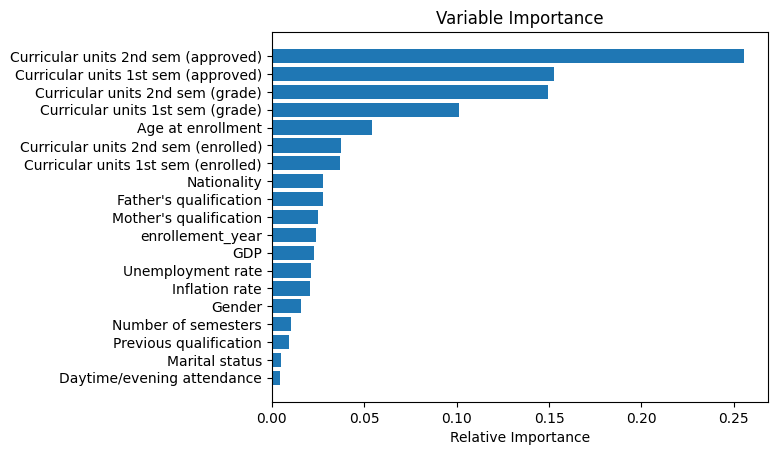

In [76]:
importances = rf.feature_importances_
features_arr = X.columns.values
sorted_idx = importances.argsort()

padding = np.arange(X_train_sc.shape[1])
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features_arr[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')


### . Deploiement ###

In [77]:
df_new.columns

Index(['Marital status', 'Daytime/evening attendance', 'Nationality',
       'Previous qualification', 'Mother's qualification',
       'Father's qualification', 'Gender', 'Age at enrollment',
       'enrollement_year', 'Number of semesters',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'BinaryTarget'],
      dtype='object')

In [78]:
df_new = df_new.drop(['Gender', 'Number of semesters', 'enrollement_year', 'Inflation rate', 'GDP', 'Unemployment rate','Daytime/evening attendance','Unemployment rate','Inflation rate','GDP','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)'], axis=1)

In [79]:
df_new.columns

Index(['Marital status', 'Nationality', 'Previous qualification',
       'Mother's qualification', 'Father's qualification', 'Age at enrollment',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)', 'BinaryTarget'],
      dtype='object')

In [80]:
X = df_new.drop('BinaryTarget', axis=1)  # Features (all columns except the target)
y = df_new['BinaryTarget']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Verify the shape of the split datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (2904, 10)
Testing set shape: (726, 10)


In [81]:
scaler = StandardScaler()

In [82]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [83]:
X_train.iloc[0, :]

Marital status                          1
Nationality                             1
Previous qualification                  1
Mother's qualification                  3
Father's qualification                 28
Age at enrollment                      19
Curricular units 1st sem (enrolled)     5
Curricular units 1st sem (approved)     0
Curricular units 2nd sem (enrolled)     6
Curricular units 2nd sem (approved)     0
Name: 1116, dtype: int64

In [84]:
LRR = LogisticRegression()
LRR.fit(X_train_sc,y_train)

y_predictLRR = LRR.predict(X_test_sc)
print(confusion_matrix(y_test,y_predictLR))
print('Accuracy Logistic Regression {0:.3f}'.format(accuracy_score(y_test,y_predictLRR)))
print('Precision Logistic Regression {0:.3f}'.format(precision_score(y_test,y_predictLRR)))
print('Recall Logistic Regression {0:.3f}'.format(recall_score(y_test,y_predictLRR)))

[[224  53]
 [ 27 422]]
Accuracy Logistic Regression 0.890
Precision Logistic Regression 0.877
Recall Logistic Regression 0.955


In [85]:
import pickle

In [87]:
with open('data.pkl_unique','wb') as file:
    pickle.dump(LRR, file)